In [71]:
import sys 
sys.path.insert(0, '/home/onesh/repos/denoising-diffusion-pytorch//')

In [73]:
import numpy as np 
import matplotlib.pyplot as plt
import cv2 
from PIL import Image 


In [3]:
color_path = "/home/onesh/data/many_tote_images/verified_tote_images/20241224-10-59-49-040_color.png"
depth_path = color_path.replace("color", "depth").replace("png", "npy")

In [9]:
crop_corner_u1 = 290
crop_corner_v1 = 250
crop_corner_u2 = 1560
crop_corner_v2 = 930

In [ ]:
color_img = Image.open(color_path).crop(box=(crop_corner_u1, crop_corner_v1, crop_corner_u2, crop_corner_v2))
plt.imshow(color_img) 

In [ ]:
depth_img = np.load(depth_path)
depth_img = depth_img[crop_corner_v1:crop_corner_v2, crop_corner_u1:crop_corner_u2]
plt.imshow(depth_img)

In [ ]:
print(np.max(depth_img))
print(np.min(depth_img))

In [ ]:
rescaled_depth_img = (depth_img - np.min(depth_img)) / (np.max(depth_img) - np.min(depth_img)) * 255
rescaled_depth_img = rescaled_depth_img.astype(np.uint8)
print(np.max(rescaled_depth_img))
print(np.min(rescaled_depth_img))
plt.imshow(rescaled_depth_img)

In [ ]:
np.unique(depth_img)

# show results 

In [74]:
def create_subplots(recreated, original): 
    f, (ax1, ax2) = plt.subplots(1, 2)
    ax1.imshow(recreated)
    ax1.set_title('Recreated')
    ax2.imshow(original)
    ax2.set_title('Original')
    
crop_corner_u1 = 290
crop_corner_v1 = 250
crop_corner_u2 = 1560
crop_corner_v2 = 930
depth_min = 0
depth_max = 2000

def rescale_pixel_to_depth(pixel: np.ndarray):
    """Rescale pixel image to be between 0 and 2000 mm"""
    d_range = depth_max - depth_min
    return pixel * d_range + depth_min

In [63]:
recreated_depth_path = "/home/onesh/repos/denoising-diffusion-pytorch/denoising_diffusion_pytorch/inpainting/inpainted_depth_2.npy"
original_depth_path = recreated_depth_path.replace("inpainted_depth", "original_depth")
recreated_depth_img = np.load(recreated_depth_path)
original_depth_img = np.load(original_depth_path)
print(np.max(recreated_depth_img))
print(np.min(recreated_depth_img))
print(np.max(original_depth_img))
print(np.min(original_depth_img))

0.9305
0.0
0.9305
0.0


In [64]:
recreated_depth_img.shape 

(128, 128)

In [65]:
original_depth_img.shape

(128, 128)

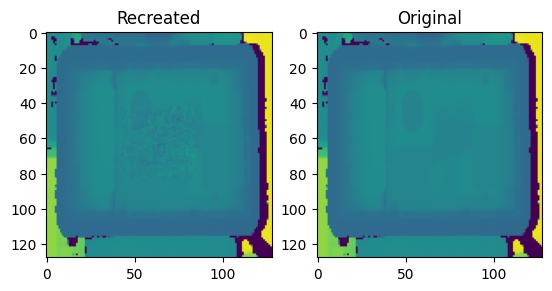

In [66]:
create_subplots(recreated_depth_img, original_depth_img)
plt.show() 

In [ ]:
depth_mm = rescale_pixel_to_depth(recreated_depth_img) 

In [76]:
print(np.max(depth_mm))
print(np.min(depth_mm))

1861.0
0.0


In [78]:
np.save(recreated_depth_path.replace('inpainted_depth', 'rescaled_depth'), depth_mm)